Name: Nikhil Supekar
NetID: ns4486

In [8]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
INPUT_FILE_PATH = '../data/ridge_regression/ridge_regression_dataset.csv'

$$
\begin{aligned}
E[\| x \|^2] & = E[\sum_{i=1}^{n} x_i^2] \\
& = \sum_{i=1}^{n} E[x_i^2] \\
& = \sum_{i=1}^{n} \sum_{j=1, y_j\in Range(x_i)}^{5} y_j^2 p(y_j) \\
& = \sum_{i=1}^{n} (-2)^2 \frac{1}{5} + (-1)^2 \frac{1}{5} + (-0)^2 \frac{1}{5} + (1)^2 \frac{1}{5} + (2)^2 \frac{1}{5} \\
& = \sum_{i=1}^{n} 2 \\
& = 2n
\end{aligned}
$$

$$
\begin{aligned}
E[\|x\|_{\infty}] & = E[max_{i} |x_i|] \\
& = E[|x_{max}|] \\
& = |-2| \frac{1}{5} + |-1| \frac{1}{5} + |0| \frac{1}{5} + |1| \frac{1}{5} + |2| \frac{1}{5} \\
& = \frac{6}{5}
\end{aligned}
$$

$$
\begin{aligned}
Cov(\overrightarrow{x}) & = [Cov(x_i, x_j)]_{ij} \\
& = [0] \text{if}\ i \neq j \text{(since $x_i$ are iid)}\\
&   [Var(x_i) \text{otherwise}] \\
& = [0] \text{if}\ i \neq j \\
&   2 \\
& = 2 I_n
\end{aligned}
$$

$$
\begin{aligned}
E[(a - y)^2]& = E[(a - E[y] + E[y] - y)^2] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + E[2(a - E[y])(E[y] - y)] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[(a - E[y])(E[y] - y)] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[E[(a - E[y])(E[y] - y) \mid y]] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[E[a E[y] - a y - E[y]^2 + E[y] y] \mid y]] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[E[a E[y] \mid y] - E[a y \mid y] - E[E[y]^2 \mid y] + E[E[y] y \mid y]] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[E[y \mid y] E[a \mid y] - y E[a \mid y] - E[y]^2 + E[y]^2]] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[y E[a \mid y] - y E[a \mid y] + 0] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[0] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] \\
\end{aligned}
$$

$$
\begin{aligned}
(a - E[y])^2 \geq 0 & \Rightarrow E[(a - E[y])^2] \geq 0 \\
& \Rightarrow E[(a - E[y])^2] + E[(E[y] - y)^2] \geq E[(E[y] - y)^2] \\
& \Rightarrow E[(a - y)^2] \geq E[(E[y] - y)^2] \\
\end{aligned}
$$

$$
\begin{aligned}
E[(a - y)^2] = E[(E[y] - y)^2] & \Leftrightarrow E[(a - E[y])^2] = 0 \\
& \Leftrightarrow a = E[y] \\
\end{aligned}
$$

$$
min_{a}(E[(a - y)^2]) = E[(E[y] - y)^2] \\
argmin_{a}(E[(a - y)^2]) = E[y]\\
$$

$$
\begin{align}
E[(a - y)^2 \mid x] & = E[(a - E[y \mid x] + E[y \mid x] - y)^2 \mid x] \\
& = E[(a - E[y \mid x])^2 + (E[y \mid x] - y)^2 + 2(a - E[y \mid x])(E[y \mid x] - y) \mid x] \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 E[(a - E[y \mid x])(E[y \mid x] - y) \mid x] \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 E[a E[y \mid x] - a y - E[y \mid x]^2 + E[y \mid x] y \mid x] \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 (E[a E[y \mid x] \mid x] - E[a y \mid x] - E[E[y \mid x]^2 \mid x] + E[E[y \mid x] y \mid x]) \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 (E[E[y \mid x] E[a \mid x] - a E[y \mid x] - E[y \mid x]^2 + E[y \mid x]^2]) \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 (0) \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] \\
\end{align}
$$

$$
\begin{align}
(a - E[y \mid x])^2 \geq 0 & \Rightarrow E[(a - E[y \mid x])^2 \mid x] \geq 0\\
& \Rightarrow E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] \geq E[(E[y \mid x] - y)^2 \mid x]\\
& \Rightarrow E[(a - y)^2 \mid x] \geq E[(E[y \mid x] - y)^2 \mid x] \\
\end{align}
$$

$$
\begin{align}
E[(a - y)^2 \mid x] = E[(E[y \mid x] - y)^2 \mid x] & \Leftrightarrow E[(a - E[y \mid x])^2 \mid x] = 0 \\
& \Leftrightarrow a - E[y \mid x] = 0 \\
& \Leftrightarrow a = E[y \mid x] \\
& \Leftrightarrow f(x) = E[y \mid x] \\
& \Rightarrow f^{*}(x) = E[y \mid x] \\
\end{align}
$$

In [27]:
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test - test set, a 2D numpy array of size (num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    num_instances = train.shape[0]
    num_features = train.shape[1]
    
    mean_vec = np.apply_along_axis(np.mean, 0, train)
    std_vec = np.apply_along_axis(np.std, 0, train)
    
    const_feature_indices = np.where(std_vec == 0)
    train = np.delete(train, const_feature_indices, 1)
    test = np.delete(test, const_feature_indices, 1)
    mean_vec = np.delete(mean_vec, const_feature_indices, 0)
    std_vec = np.delete(mean_vec, const_feature_indices, 0)
    
    train_normalized = (train - mean_vec) / std_vec
    test_normalized = (test - mean_vec) / std_vec
    
    return train_normalized, test_normalized

$$
J(\theta) = \frac{1}{m} \|X \theta - y\|^2
$$

$$
\nabla J(\theta) = \frac{2}{m} X^{T}(X \theta - y)
$$

$$
\begin{align}
J(\theta + \eta h) - J(\theta) & = \eta h \nabla J(\theta) \\
& = \frac{2 \eta h}{m} X^{T} (X \theta - y) \\
\end{align}
$$

$$
\begin{align}
\theta_{i+1} & = \theta_{i} - \eta \nabla J(\theta_{i}) \\
& = \theta_{i} - \frac{2 \eta}{m} X^{T} (X \theta - y) \\
\end{align}
$$

In [10]:
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the average square loss, scalar
    """
    m = X.shape[0]
    return np.linalg.norm(np.dot(X, theta) - y) / m


In [11]:
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    m = X.shape[0]
    return np.transpose(X).dot(np.dot(X, theta) - y) * 2 / m

In [12]:
#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    
    J = compute_square_loss
    
    for i in range(num_features):
        approx_grad[i] = (J(theta + epsilon * np.eye(1, num_features, i)) - J(theta - epsilon * np.eye(1, num_features, i))) / (2 * epsilon)
    
    return np.linalg.norm(approx_grad, true_gradient) <= tolerance

In [13]:
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    true_gradient = gradient_func(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    
    J = objective_func
    
    for i in range(num_features):
        approx_grad[i] = (J(theta + epsilon * np.eye(1, num_features, i)) - J(theta - epsilon * np.eye(1, num_features, i))) / (2 * epsilon)
    
    return np.linalg.norm(approx_grad, true_gradient) <= tolerance

In [34]:
#######################################
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    
    for i in range(1, num_step + 1):
        theta = theta_hist[i - 1, :] - alpha * compute_square_loss_gradient(X, y, theta_hist[i - 1, :])
        theta_hist[i, :] = theta
        loss_hist[i] = compute_square_loss(X, y, theta)
    
    return theta_hist, loss_hist

In [28]:

df = pd.read_csv(INPUT_FILE_PATH, delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term

Split into Train and Test
Scaling all to [0, 1]


/Users/nikhilvs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


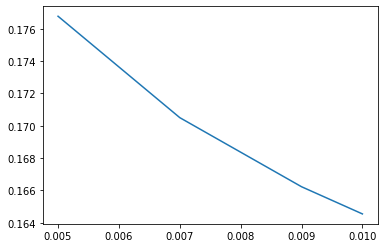

In [76]:
STEP_SIZES = [0.005, 0.007, 0.009, 0.01, 0.06]
avg_loss = []
for alpha in STEP_SIZES:
    theta, loss = batch_grad_descent(X_train, y_train, alpha)
    avg_loss.append(np.mean(loss))
# mean_vec = np.apply_along_axis(np.mean, 0, train).reshape(num_instances, 1)
# std_vec = np.apply_along_axis(np.std, 0, train).reshape(num_instances, 1)
plt.plot(STEP_SIZES, avg_loss)

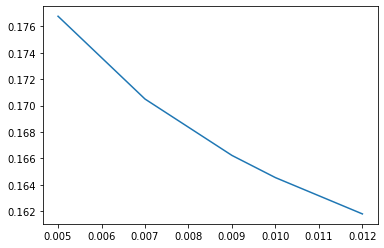

In [46]:
theta.shape

(1001, 49)